<a href="https://colab.research.google.com/github/WangariNgomi/Exploratory-Data-Analysis/blob/main/Exploratory_Data_Analysis_Pima_Indian_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting the probability of a patient having diabetes based on certain diagnostic measurements**

## 1. Problem satatement
> The objective of the dataset is to diagnostically predict whether or not a patient has diabetes based on certain diagnostic measurements.All the patients are female of at least 21 years of age and of Pima Indian heritage.

### a) Specifying the Data Analytic Question

Diagnostically predict whether or not a patient has diabetes or not.

### b) Defining the Metric for Success

1. Perform Exploratory Data Analysis on [Pima Indians Diabetes Dataset](http://bit.ly/DiabetesDataSource)

2. Train a Machine Learning model using Naive Bayes Classifier and challenge our solution by using different algorithms and select the best performing model for making predictions

### c) Understanding the context 

The dataset has several medical predictor variables and one  target variable ***Outcome***

Predictor variables include;


**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration

**BloodPressure**: Diastolic blood pressure ( mm⋅Hg )

**SkinThickness**: Triceps skin fold thickness ( mm )

**Insulin**: 2-Hour serum insulin ( mu⋅Uml )

**BMI**: Body mass index (weight in  kg  / height in  m2 )

**DiabetesPedigreeFunction**: Diabetes pedigree function (indicates the function which scores likelihood of diabetes based on family history)

**Age**: Age (in years)



### d) Recording the Experimental Design

Below are the steps taken in this analysis
 
 1. loading the required libraries
 2. Reading and previewing dataset
 3. Tidying the data
 4. Exploratory Data Analysis
 5.  Implementing the solution 
 6. Challenging the solution 

### e) Data Relevance

The data available is relevant for the intended analysis and it was originally derived from [**National Institute of Diabetes and Digestive and Kidney Diseases**](https://www.niddk.nih.gov/) 

### f) Loading Libraries
Before we dive into the dataset, let’s first import the relevant librarie

In [ ]:
import pandas as pd #used to analyze data
import numpy as np #used for working with arrays
import seaborn as sns #helps you explore and understand your data using stattistical graphs, it is built on matplotlib
import matplotlib #used for creating interactive visualizations 
from matplotlib import pyplot as plt #API for matplotlib and is used for graphic visualizations
import plotly as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Reading the Data

In [ ]:
# mounting google drive into my notebook
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# we use the read_csv() function to read the data into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 2/Datasets/diabetes.csv')
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1




## 3. Checking the Data

In [ ]:
data.shape #getting the number of entries in the dataset:
print("The dataset contains {} rows, and {} columns".format(data.shape[0], data.shape[1]))

The dataset contains 768 rows, and 9 columns


In [ ]:
data.head(3) #displaying first three columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
data.tail(3)#displaying last three columns

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# Checking the summary information of the data, the datatypes of the various columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Observation**

The output shows the list of all columns with their data types and the number of non-null values in each column. From the summary, we are able to see columns the dataset has no null and the features are in the correct data types

In [ ]:
# getting summary statisctics for both categorical and numerical columns
data.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the summarry statistics we can see we have no categorical variables

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Tidying the Dataset

In [ ]:
data.columns #checking column names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# The column names are not in the correct format, before modification,
#we need to make a copy of the original dataset
data1 = data.copy(deep=True) # Modifications to the data of the copy will not be reflected in the original object
data1.head(3) #previewing the first three rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
# Renaming columns into the right format
data1.rename(columns = {'BloodPressure':'Blood_Pressure', 'SkinThickness':'Skin_Thickness',
                              'DiabetesPedigreeFunction':'Diabetes_Pedigree_Function'}, inplace = True)

In [ ]:
data1.columns #confirmimg the column names

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       'BMI', 'Diabetes_Pedigree_Function', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#We want to see the number of null values in the dataset
data1.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64

There are no null values

In [ ]:
# Ascertaining unique values in our target variable
print (data1.Outcome.unique())

[1 0]


The outcome column tells us whether patient is diagnosed with Diabetes 0 stands for No and 1 for Yes)

In [ ]:
# Cheking for Outliers

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(
    go.Box(y= data1['Pregnancies'], name="Pregnancies"),
)

fig.add_trace(
    go.Box(y= data1['Glucose'], name="Glucose"),
)
fig.add_trace(
    go.Box(y= data1['Blood_Pressure'], name="Blood_Pressure"),
)


fig.update_layout(
    title_text="Checking for Outliers",
    yaxis_title_text="Values",
    height=1000, 
    width=2000
)
fig.show()


**observation**

**Glucose and Blood Pressure** - The minimum value for Glucose and Blood Pressure is 0 which is logically incorrect. The zero values could be representing missing values in the dataset

**Pregnancies** - the values above the upper fence lied between 14 to 17

I am going to retain outliers in the dataset as they contain useful information and fill the 0 values with the mediamn during data preproccessing when training my model.



In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()



fig.add_trace(
    go.Box(y= data1['Skin_Thickness'], name="Skin_Thickness"),
)
fig.add_trace(
    go.Box(y= data1['Insulin'], name="Insulin"),
)
fig.add_trace(
    go.Box(y= data1['BMI'], name="BMI"),
)

fig.add_trace(
    go.Box(y= data1['Age'], name="Age"),
)
fig.update_layout(
    title_text="Checking for Outliers",
    yaxis_title_text="Values",
    height=1200, 
    width=1800
)
fig.show()


**observation**

The minimum value for BMI is also 0 which is logically incorrect which could be a representation of missing values

Skin thickness had a maximum value of 99, and age values that were above the upper fence lied between 67 and 81

I am going to retain outliers in the dataset as they contain useful information and fill the 0 values with the mediamn during data preproccessing when training my model.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(
    go.Box(y= data1['Diabetes_Pedigree_Function'], name="Diabetes_Pedigree_Function"),
)



fig.update_layout(
    title_text="Checking for Outliers",
    yaxis_title_text="Values",
    height=1000, 
    width=2000
)
fig.show()

**Observation**

the values above the upper fencerange from 1.224 and 2.42, I am going to retain outliers since they are necessary in the analysis.

## 6. Exploratory Analysis

In [ ]:
# Understanding the target distribution
import plotly.express as px
import plotly.graph_objects as go
fig = make_subplots(rows=1, cols=2, specs = [[{'type' : 'xy'}, {'type' : 'domain'}]], subplot_titles = ['Bar Chart', 'Pie Chart'])

fig.add_trace(
    go.Bar(x= data1['Outcome'].value_counts().index,
           y=data1['Outcome'].value_counts().values),
 
    row=1, col=1
)
fig.add_trace(go.Pie(labels = data1['Outcome'].value_counts().index,
                     values = data1['Outcome'].value_counts().values),
              
              
    row=1, col=2
    
)
fig.update_layout({ 'title' : { 'text' : 'Target Distribution',
                               'x' : 0.5, 'y' : 0.9,
                               'font_size' : 25, 'font_color' : 'Crimson'}},
                  showlegend = False)
fig.update_xaxes(title_text = 'Outcome', color = 'Crimson')
fig.update_yaxes(title_text = 'Yes/No', color = 'Crimson')
marker = dict (color = 'LightSeaGreen')
fig.show()

**Observation**



* Our target variable has two categories, 0 represents those who don't have diabetes and 1 those who have diabetes.

* Out of the 768 respondents, The bar chart shows 500 patients have diabetes, and 268 do not have diabetes

* The percentage as shown in the pie chart of those who have diabetes represent 34.9% of the sample and those who did not have represent 65.1% 

* We can also see our class imbalanced


## 7. Bivariate Analysis

Analyzing all features against the target variable

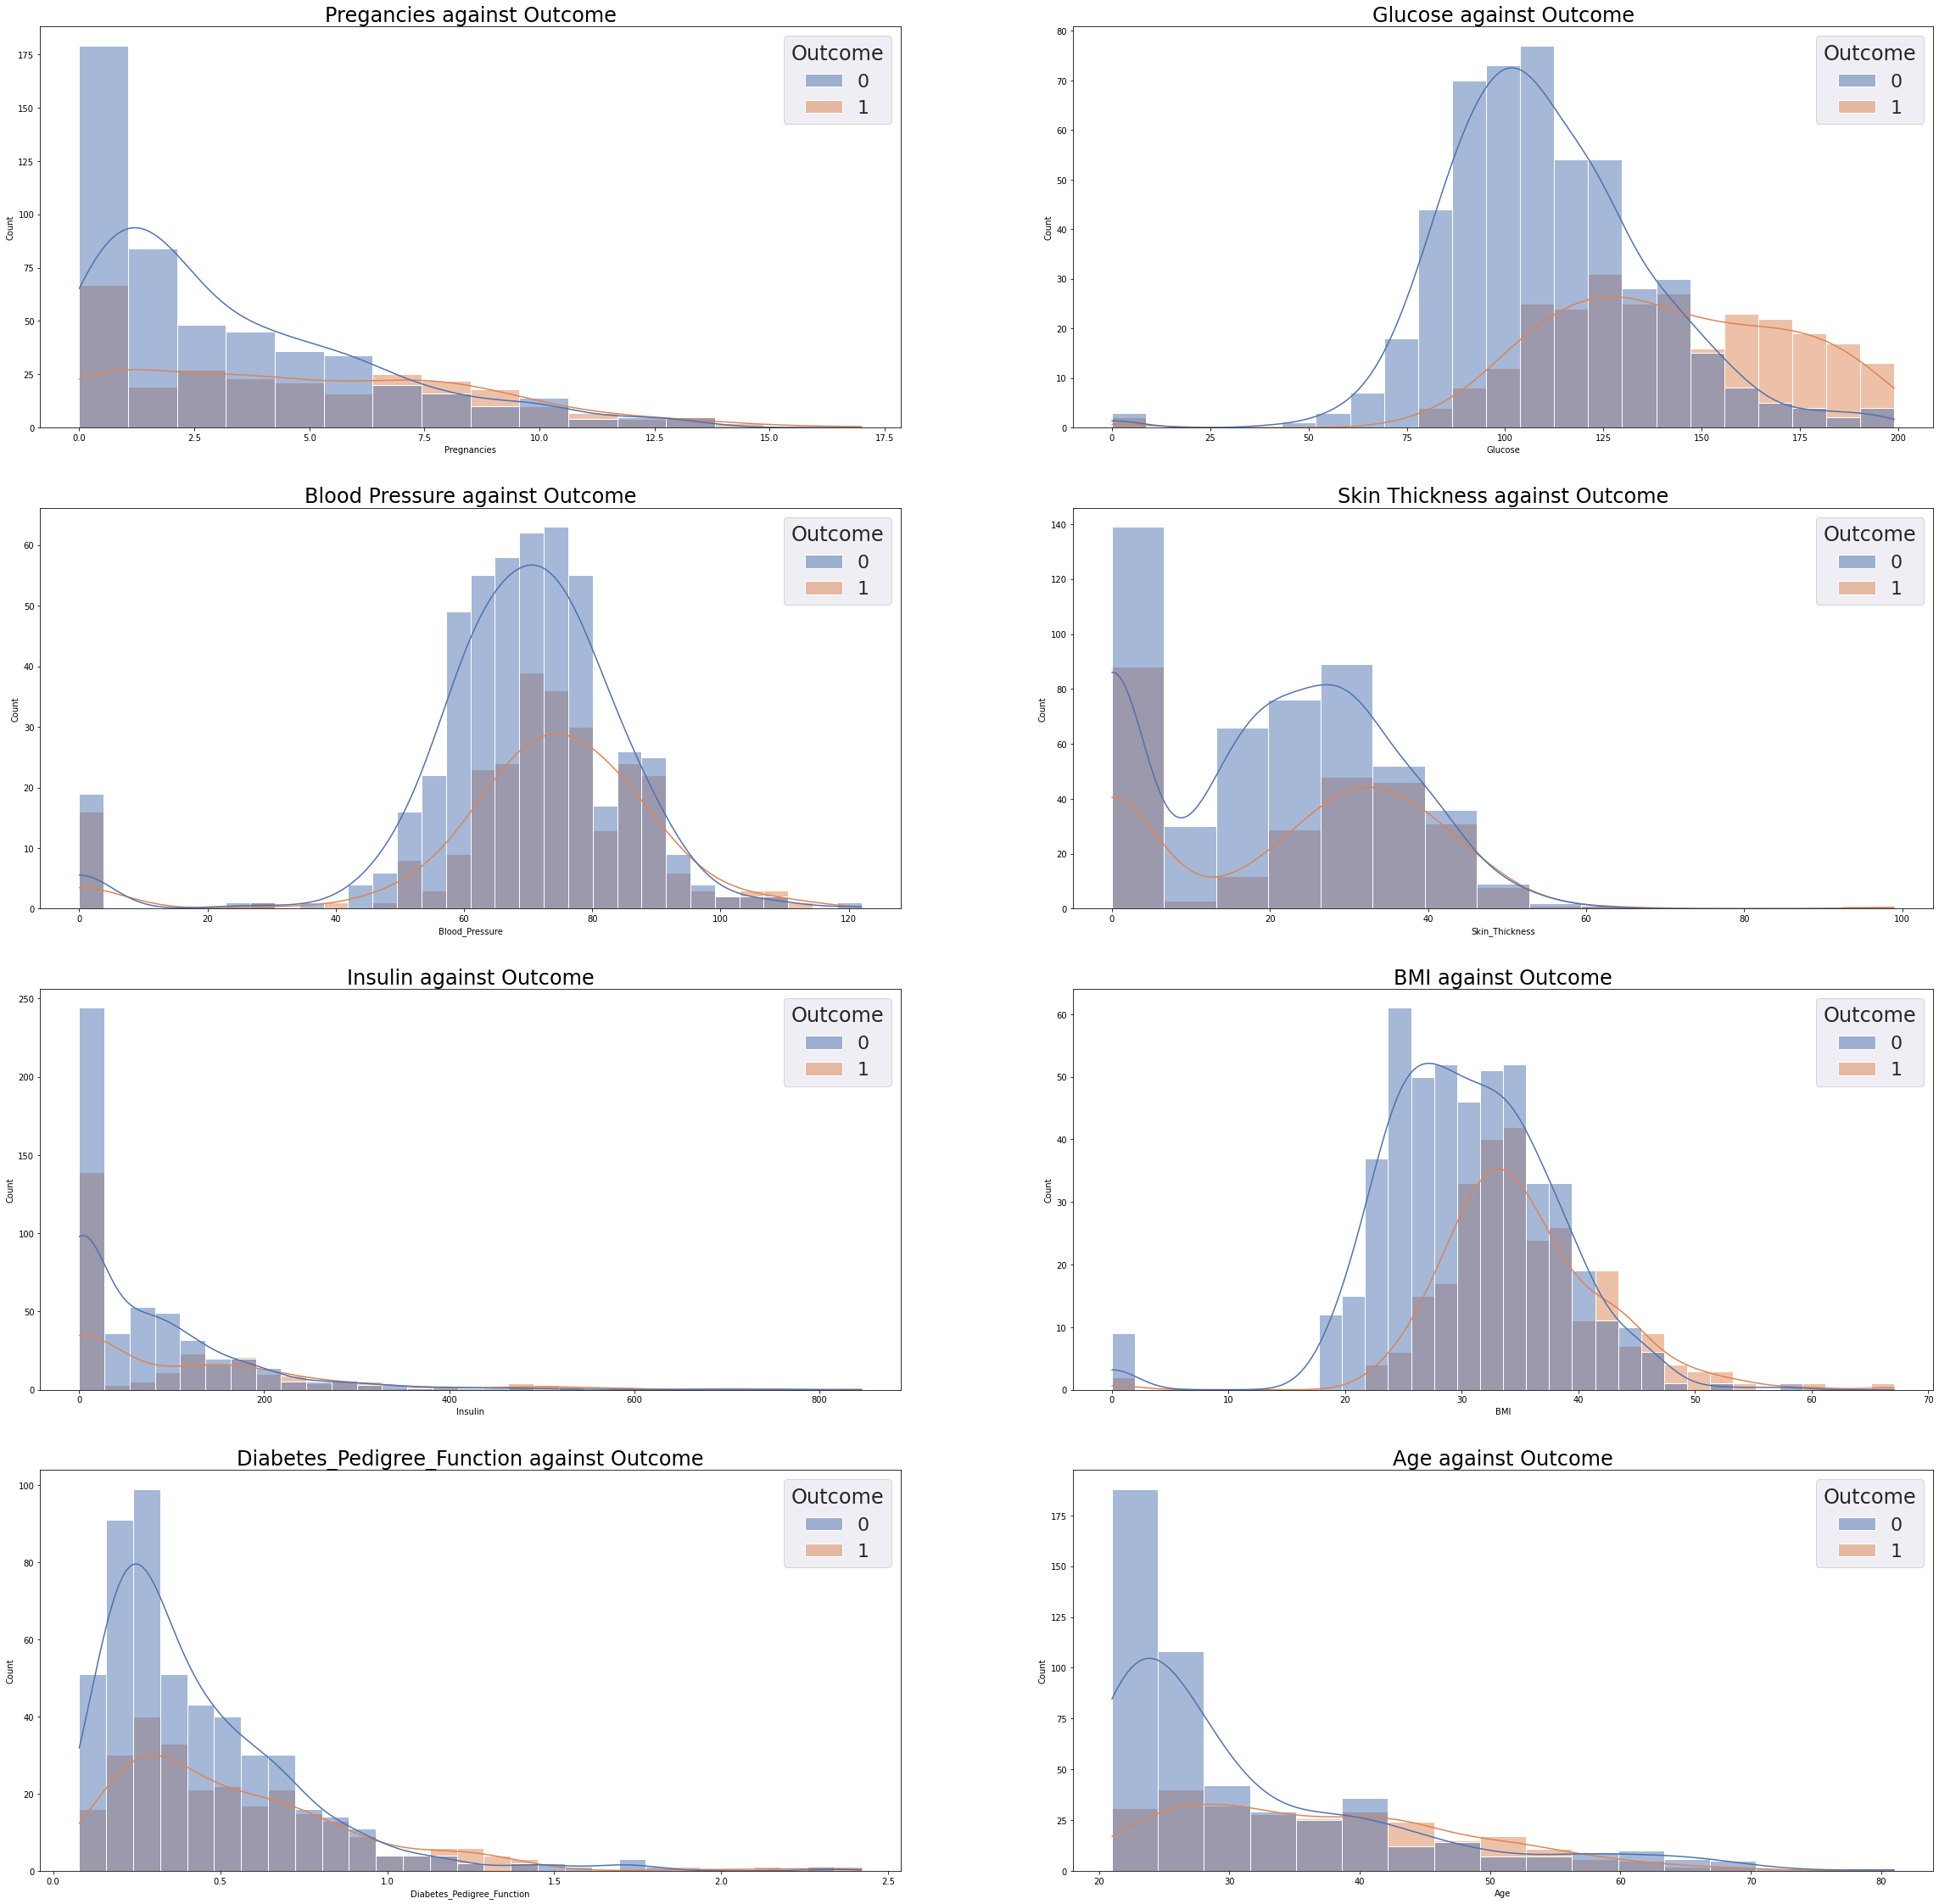

In [ ]:
fig, axis = plt.subplots(4, 2, figsize =(40, 40))
sns.set(font_scale=2)
# plot 1
sns.histplot(data=data1, x="Pregnancies", color = 'blue', hue="Outcome", kde=True, ax= axis [0,0]).set(title='Pregancies against Outcome');

# plot 2
sns.histplot(data=data1, x="Glucose", color = 'blue', hue="Outcome", kde=True, ax= axis [0,1]).set(title='Glucose against Outcome');

# # Plot 3
sns.histplot(data=data1, x="Blood_Pressure", color = 'blue', hue="Outcome", kde=True, ax= axis [1,0]).set(title='Blood Pressure against Outcome');

# # Plot 4
sns.histplot(data=data1, x="Skin_Thickness", color = 'blue', hue="Outcome", kde=True, ax= axis [1,1]).set(title='Skin Thickness against Outcome');

# # Plot 5
sns.histplot(data=data1, x="Insulin", color = 'blue', hue="Outcome", kde=True, ax= axis [2,0]).set(title='Insulin against Outcome');

# # Plot 6
sns.histplot(data=data1, x="BMI", color = 'blue', hue="Outcome", kde=True, ax= axis [2,1]).set(title='BMI against Outcome');

# # Plot 7
sns.histplot(data=data1, x="Diabetes_Pedigree_Function", color = 'blue', hue="Outcome", kde=True, ax= axis [3,0]).set(title='Diabetes_Pedigree_Function against Outcome');

# # Plot 8
sns.histplot(data=data1, x="Age", color = 'blue', hue="Outcome", kde=True, ax= axis [3,1]).set(title='Age against Outcome');

plt.show()

**Observation**

**1. Pregancies against Outcome** - The distribution is skewed to the left, most patients had a minimum of 0 to 2 pregnancies and the number decreased as the the number of prengancies incresed. A very few number had more than ten pregnancies.

There is some positive linear correlation of Pregnancies with Outcome as the number of patients with diabetes increase as the number of prgnancies increase

**2. Glucose against Outcome** - There is a  positive linear correlation between glucose and outcome. As the value of Glucose increases, the count of patients having diabetes increases.

We can also note that after the Glucose value of 125, there is a steady increase in the number of patients having Outcome of 1.

We need to fill the zero values with the with the mean or median.

**3. Blood Pressure against Outcome**- the distribution is skewed to the left.
The value of Outcome do not increase linearly as value of BloodPressure increases.However, for BloodPressure values greater than 82, count of patients with Outcome as 1, is more.

**4. Skin Thickness against Outcome** - the distribution is skewed to the left.
The value of Outcome do not increase linearly as value of skin thickness increases.

**5. Insulin against Outcome** - the distribution is skewed to the right mainly because of 0-values which are more than 200.the is also no linear relationship between insulin levels and diabetes.

**6. BMI against Outcome** - there is a positive linear correlation is evident for BMI.

**7. Diabetes_Pedigree_Function against Outcome** - The distribution is skewed to the right. the relationship is non linear but the outcome of 1 increases from a pedigree function of 1.2 to 1.5

**8. Age against Outcome** - The distribution is skewed to the left. there is some linear positive correlation between age and outcome.For Age above 40 years, the chances of patients having diabetes increases


## 8. Checking for Multicollinearity

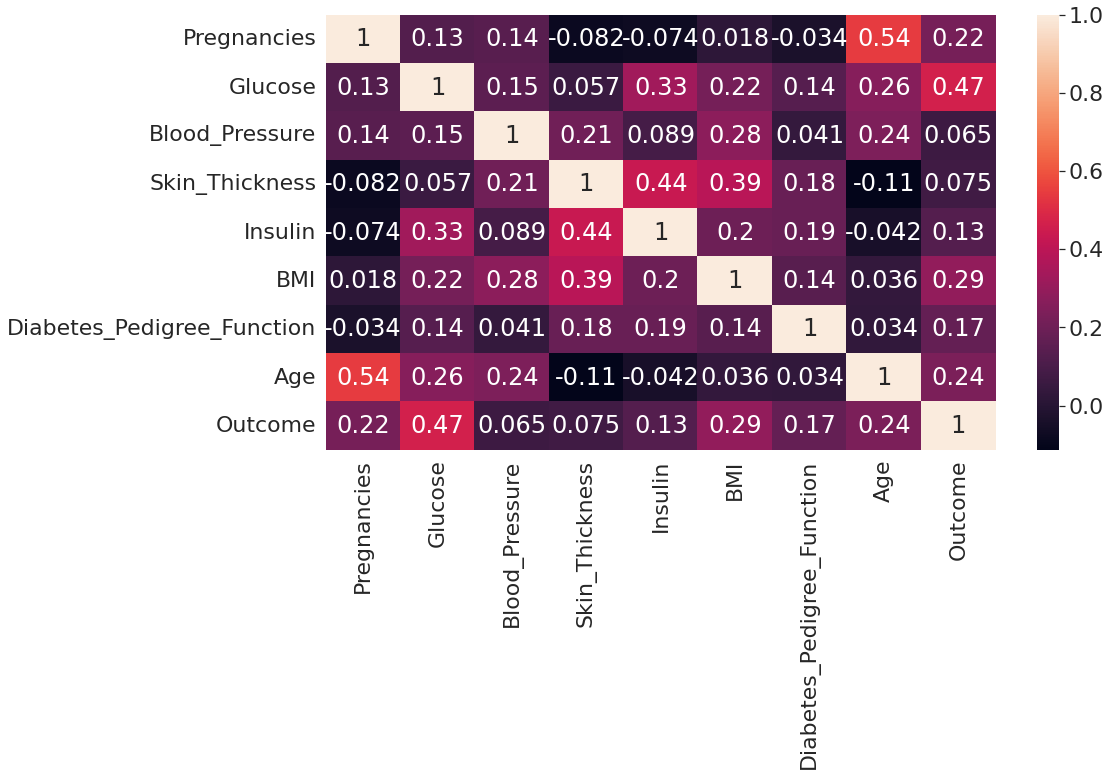

In [ ]:
# Analyzing Correlations of different  using a heap map
plt.figure(figsize=(15,8))
sns.heatmap(data1.corr(), annot=True)
plt.show()

**Observation**

* Glucose has the maximum positive linear correlation with Outcome, which is logical.
* BloodPressure has the lowest positive linear correlation with Outcome.
* No feature has a negative linear correlation with Outcome.





## 9. Normality test

evaluating whether was drawn from a Gaussian distribution

In [ ]:
# imporing the shapiro function
from scipy.stats import shapiro 

# testing for normality
stat, p = shapiro(data1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
  
# Running the example first calculates the test on the data sample, 
# then prints the statistic and calculated p-value. 
# The p-value is interested and finds that the data is likely drawn from a Gaussian distribution.

Statistics=0.692, p=0.000
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



## 7. Implementing the Solution

At this point, we are going to develop a model and train it to make oredictions.

The first step is data pre processing where we will split into training and testing set: Using Stratified Split since our class is imbalancedd to 

The second thing we will do is to fill the  missing values: BMI, Blood Pressure, Glucose, have 0-values which is not logical. So we need to replace them with either mean or median.



### a) Train and Test Split

In [ ]:
# Using the Stratified technique we want to split the dataset in such a way 
# that 80% of our dataset will be train set and 20% will be test set.
# Furthermore, the proportion of the outcome should be equal in both 
# the train and test dataset. 

# Split the independent and dependent variables
# We want to predict if someone has diabetes, so let's use Outcome column as our Y 
# 
y = data1['Outcome']

X = data1.drop(['Outcome'], axis = 1)

# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)


In [ ]:
# previewing our target variable to see the propotions in the train set
y_train.value_counts(normalize = True) * 100

0    65.14658
1    34.85342
Name: Outcome, dtype: float64

In [ ]:
# previewing our target variable to see the propotions in the test set
y_test.value_counts(normalize = True) * 100

0    64.935065
1    35.064935
Name: Outcome, dtype: float64

**Oservation**
we have equal proportions of the target variable in both train and test sets

### a) Filling missing values

we are going to fill zero values for Glucose, BloodPressure, SkinThickness, Insulin, and BMI with their median values.

However, we will store the medians in an array, so that the test set can be replaced by that medians.

Note: It is essential to split the dataset before performing Imputation (replacement of missing values) and Standardization to avoid data leaking of the test set into the training set. We want our model to perform good on unseen data.

In [ ]:
median_values = [] # to store medians
features = ["Glucose", "Blood_Pressure", "Skin_Thickness", "Insulin", "BMI"]

for i in features:
    median_values.append(X_train[features].median())
    
print("Medians are: ", median_values)
     

Medians are:  [Glucose           117.00
Blood_Pressure     72.00
Skin_Thickness     23.00
Insulin             0.00
BMI                31.95
dtype: float64, Glucose           117.00
Blood_Pressure     72.00
Skin_Thickness     23.00
Insulin             0.00
BMI                31.95
dtype: float64, Glucose           117.00
Blood_Pressure     72.00
Skin_Thickness     23.00
Insulin             0.00
BMI                31.95
dtype: float64, Glucose           117.00
Blood_Pressure     72.00
Skin_Thickness     23.00
Insulin             0.00
BMI                31.95
dtype: float64, Glucose           117.00
Blood_Pressure     72.00
Skin_Thickness     23.00
Insulin             0.00
BMI                31.95
dtype: float64]


In [ ]:
# helper function
def replace_with_median(ndf, feat, value):
    ndf[feat] = ndf[feat].replace(0, value)
    return replace_with_median
    
for i, feat in enumerate(features):
    replace_with_median(X_train, features, median_values[i])
    replace_with_median(X_test, features, median_values[i])

### c) Feature Scaling

In [ ]:
# Here we do feature scaling, we start by importing the library neccesary for scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### d) Modelling

#### i) Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import BernoulliNB
# Training our Bernoulli Naive Bayes Classifier
# 
# Creating oour Bernoulli Naive Bayes object with prior probabilities of each class
clf = BernoulliNB()

# Train model
model = clf.fit(X_train, y_train)


In [ ]:
# make predictions
y_prediction = clf.predict(X_test)


In [ ]:
# Here we evaluate the performance. We make use of the confusion matrix and find the accuraccy of the prediction
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


print(classification_report(y_test, y_prediction))
cm = confusion_matrix(y_test, y_prediction)
print(cm)
print('Accuracy of our model is' + ' ' + str(accuracy_score(y_test, y_prediction)))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       100
           1       0.59      0.54      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.70       154

[[80 20]
 [25 29]]
Accuracy of our model is 0.7077922077922078


**Observation**


1.   The accuracy of our model is 70.77% with an F1 score of 78%




## 8. Challenging the solution

> At this point, I will be using AdaBoost and XGBoost classifiers to challenge the output obtained from Naive Bayes and select the best performing model






#### ii) AdaBoost Classifier

In [ ]:
# Reviewing the Solution using AdaBoost
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

# Creating our model
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits= 10, random_state= seed, shuffle = True)
model = AdaBoostClassifier(n_estimators= num_trees, random_state = seed)

# Train model
model1 = model.fit(X_train, y_train)

# make predictions
y_prediction1 = model1.predict(X_test)

#Evaluating our algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_prediction1))
print(classification_report(y_test, y_prediction1))
results = model_selection.cross_val_score(model1, X, y, cv = kfold)
print(results.mean())



[[85 15]
 [24 30]]
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154

0.7552802460697198


**Observation**



* AdaBoost classifier perfoms better compared to Naive Bayes
* AdaBoost has an accuracy of 75% and an F1 sciore of 81%



#### iii) XGBoost Classifier

In [ ]:
# Reviewing the Solution using XGBoost
from xgboost import XGBClassifier
clf = XGBClassifier()

# Creating our model
seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits= 10, random_state= seed, shuffle = True)
model2 = XGBClassifier(n_estimators= num_trees, random_state = seed, objective = {'binary : logistic'})

# Train model
model2 = clf.fit(X_train, y_train)

# make predictions
y_prediction2 = model2.predict(X_test)

#Evaluating our algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_prediction2))
print(classification_report(y_test, y_prediction2))
results = model_selection.cross_val_score(model2, X, y, cv = kfold)
print(results.mean())

[[87 13]
 [18 36]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       100
           1       0.73      0.67      0.70        54

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154

0.7695830485304169


**Observation**

**XGBoost Classifier** has perfomed best with an accuracy score of 76.9% and an F1 score of 85%

#### iv) Neural Networks

In [ ]:
#### iv) Neural Networks

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?